# Explore ROOT files

In [1]:
import ROOT
import numpy as np
import root_numpy as rnp
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
beam_energy = 600
num_dp = 30
neutrons = 1

filename = f"simulation/training_{beam_energy}AMeV_{num_dp}dp_{neutrons}n.digi.root"

print(rnp.list_trees(filename))
print(rnp.list_branches(filename))
print(rnp.list_directories(filename))

['evt']
['EventHeader.', 'NeulandHits', 'NeulandClusters', 'NeulandPrimaryPoints', 'NeulandPrimaryHits', 'NeulandPrimaryClusters', 'NeulandSecondaryClusters']
['R3BNeulandDigitizer', 'R3BNeulandPrimaryInteractionFinder']


In [3]:
print(f"Reading ROOT file {filename}")
tfile = ROOT.TFile.Open(filename)
ttree = tfile.Get("evt")

i = 0
for event in ttree:
    print(
        neutrons,
        event.NeulandPrimaryPoints.GetEntries(),
        event.NeulandPrimaryHits.GetEntries(),
        event.NeulandHits.GetEntries(),
        event.NeulandClusters.GetEntries(),
    )
    i += 1
    if i > 10:
        break

Reading ROOT file simulation/training_600AMeV_30dp_1n.digi.root
1 1 1 24 15
1 1 1 16 2
1 1 1 31 15
1 1 1 21 10
1 1 1 15 8
1 1 1 9 7
1 1 1 17 7
1 1 1 19 1
1 1 1 20 5
1 1 1 20 7
1 1 1 13 8


Reading ROOT file simulation/training_600AMeV_30dp_1n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_2n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_3n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_4n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_5n.digi.root


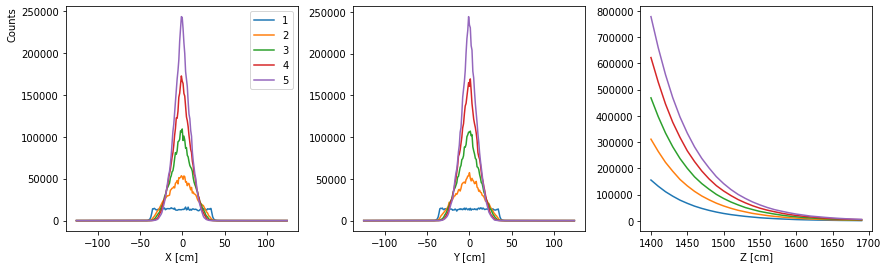

In [13]:
fig = plt.figure(figsize=(2 * 6.224, 2 * (6.224 / 1.618 * 0.5)))

ax1 = fig.add_subplot(131)
ax1.set_ylabel(r"Counts", horizontalalignment="right", y=1)
ax1.set_xlabel(r"X [cm]")

ax2 = fig.add_subplot(132)
ax2.set_xlabel(r"Y [cm]")

ax3 = fig.add_subplot(133)
ax3.set_xlabel(r"Z [cm]")

for neutrons in range(1,6):
    filename = f"simulation/training_{beam_energy}AMeV_{num_dp}dp_{neutrons}n.digi.root"
    print(f"Reading ROOT file {filename}")
    tfile = ROOT.TFile.Open(filename)
    ttree = tfile.Get("evt")
    hx = ROOT.TH1F("hx", "Title", 250, -125, 125)
    hy = ROOT.TH1F("hy", "Title", 250, -125, 125)
    hz = ROOT.TH1F("hz", "Title", 30, 1400, 1700)
    ttree.Draw('NeulandPrimaryPoints.fX>>hx')
    ttree.Draw('NeulandPrimaryPoints.fY>>hy')
    ttree.Draw('NeulandPrimaryPoints.fZ>>hz')
    ax1.plot(range(-125, 125), rnp.hist2array(hx), label=str(neutrons))
    ax2.plot(range(-125, 125), rnp.hist2array(hy))
    ax3.plot(range(1400, 1700, 10), rnp.hist2array(hz))

ax1.legend()
fig.tight_layout()

Reading ROOT file simulation/training_600AMeV_30dp_1n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_2n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_3n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_4n.digi.root
Reading ROOT file simulation/training_600AMeV_30dp_5n.digi.root


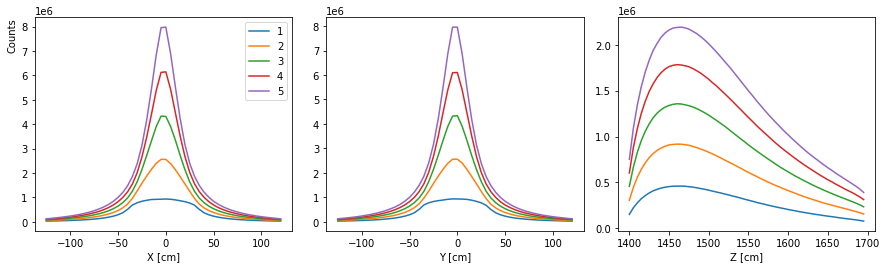

In [19]:
fig = plt.figure(figsize=(2 * 6.224, 2 * (6.224 / 1.618 * 0.5)))

ax1 = fig.add_subplot(131)
ax1.set_ylabel(r"Counts", horizontalalignment="right", y=1)
ax1.set_xlabel(r"X [cm]")

ax2 = fig.add_subplot(132)
ax2.set_xlabel(r"Y [cm]")

ax3 = fig.add_subplot(133)
ax3.set_xlabel(r"Z [cm]")

for neutrons in range(1,6):
    filename = f"simulation/training_{beam_energy}AMeV_{num_dp}dp_{neutrons}n.digi.root"
    print(f"Reading ROOT file {filename}")
    tfile = ROOT.TFile.Open(filename)
    ttree = tfile.Get("evt")
    hx = ROOT.TH1F("hx", "Title", 50, -125, 125)
    hy = ROOT.TH1F("hy", "Title", 50, -125, 125)
    hz = ROOT.TH1F("hz", "Title", 60, 1400, 1700)
    ttree.Draw('NeulandHits.fPosition.fX>>hx')
    ttree.Draw('NeulandHits.fPosition.fY>>hy')
    ttree.Draw('NeulandHits.fPosition.fZ>>hz')
    ax1.plot(range(-125, 125, 5), rnp.hist2array(hx), label=str(neutrons))
    ax2.plot(range(-125, 125, 5), rnp.hist2array(hy))
    ax3.plot(range(1400, 1700, 5), rnp.hist2array(hz))

ax1.legend()
fig.tight_layout()